A simple convnet example that classifies MNIST figures

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [4]:
from tensorflow.python import metrics
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype("float32") / 255
model.compile(
    optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(train_images, train_labels, epochs=2, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/2
938/938 [==============================] - 38s 40ms/step - loss: 0.1581 - accuracy: 0.9510
Epoch 2/2
938/938 [==============================] - 37s 39ms/step - loss: 0.0441 - accuracy: 0.9866


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc: 3f}")


313/313 [==============================] - 2s 7ms/step - loss: 0.0396 - accuracy: 0.9869
Test accuracy:  0.986900


1/1 [==============================] - 0s 90ms/step


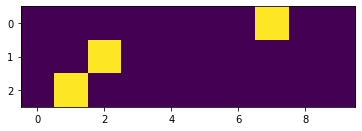

In [6]:
import matplotlib.pyplot as plt
predictions = model.predict(test_images[:3])
plt.imshow(predictions)


The sample at index 0 was estimated at 7. The sample at index 1 was estimated as 2. The sample at index 2 was estimated as 1.

In [7]:
model.save("model.h5")

In [8]:
model = keras.models.load_model("model.h5")

(-0.5, 27.5, 27.5, -0.5)

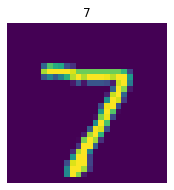

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax = plt.subplot(3, 3, 1)
plt.imshow(test_images[0].reshape((28,28)))
plt.title(int(test_labels[0]))
plt.axis("off")


Making predictions with the image below, which is not in the dataset

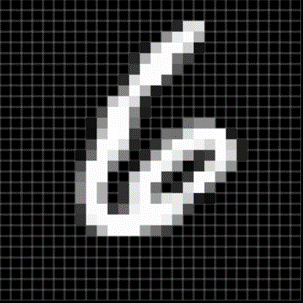

1/1 [==============================] - 0s 13ms/step


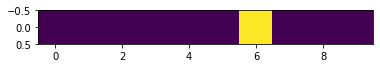

In [111]:
import tensorflow as tf

img = keras.preprocessing.image.load_img(
    "/content/mnist1.jpg",target_size=(28,28),color_mode='grayscale')

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
plt.imshow(predictions)

the model made 6 predictions for the picture